<a href="https://colab.research.google.com/github/ChintPatel/CMPE-258-HW5/blob/main/keras_hub_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Colab: Image Classification with Keras Variations

## Setup

!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Suppress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print("Setup complete.")

Setup complete.


# Easy: MNIST Digit Classification with Dropout
Variation: Add dropout to prevent overfitting.

In [6]:
# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Build model with dropout
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),  # Variation
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Easy - Test accuracy: {acc:.4f}")
# Explanation: Dropout reduces overfitting by randomly dropping 25% of units during training.

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8529 - loss: 0.5168 - val_accuracy: 0.9694 - val_loss: 0.1050
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9719 - loss: 0.0958 - val_accuracy: 0.9798 - val_loss: 0.0705
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9800 - loss: 0.0654 - val_accuracy: 0.9818 - val_loss: 0.0618
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9855 - loss: 0.0460 - val_accuracy: 0.9839 - val_loss: 0.0559
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9882 - loss: 0.0392 - val_accuracy: 0.9851 - val_loss: 0.0499
Easy - Test accuracy: 0.9865


# Intermediate: CIFAR-10 Classification with Adam
Variation: Use Adam optimizer instead of RMSprop.

In [3]:
# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Build model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile with Adam and train
model.compile(optimizer='adam',  # Variation
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Intermediate - Test accuracy: {acc:.4f}")
# Explanation: Adam adapts learning rates per parameter, potentially improving convergence over RMSprop.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3541 - loss: 1.7802 - val_accuracy: 0.5499 - val_loss: 1.2999
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5722 - loss: 1.2089 - val_accuracy: 0.6164 - val_loss: 1.1048
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6382 - loss: 1.0425 - val_accuracy: 0.6382 - val_loss: 1.0418
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6684 - loss: 0.9534 - val_accuracy: 0.6500 - val_loss: 1.0276
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6945 - loss: 0.8872 - val_accuracy: 0.6693 - val_loss: 0.9558
Intermediate - Test accuracy: 0.6724


# Advanced: Transfer Learning with MobileNetV2
Variation: Fine-tune more layers by freezing fewer.

In [4]:
# Load and preprocess CIFAR-10 subset for speed
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train[:5000].astype('float32') / 255.0
x_test = x_test[:1000].astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train[:5000], 10)
y_test = keras.utils.to_categorical(y_test[:1000], 10)

# Load MobileNetV2 with variation
base_model = keras.applications.MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
base_model.trainable = True
for layer in base_model.layers[:50]:  # Variation: Freeze only first 50 layers
    layer.trainable = False

# Build model
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Advanced - Test accuracy: {acc:.4f}")
# Explanation: Fine-tuning more layers leverages pre-trained weights, balancing adaptation and overfitting.

<ipython-input-4-83073f761b75>:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.2572 - loss: 2.5675 - val_accuracy: 0.1130 - val_loss: 10.2817
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4790 - loss: 1.5785 - val_accuracy: 0.1540 - val_loss: 9.3931
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5055 - loss: 1.5753 - val_accuracy: 0.1790 - val_loss: 8.0930
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5468 - loss: 1.3808 - val_accuracy: 0.2060 - val_loss: 7.7794
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5736 - loss: 1.3565 - val_accuracy: 0.1050 - val_loss: 12.7629
Advanced - Test accuracy: 0.1040


# Expert: Autoencoder for Image Denoising with More Filters
Variation: Increase convolutional filters for better capacity.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.2531 - val_loss: 0.1122
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1105 - val_loss: 0.1091
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1080 - val_loss: 0.1075
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


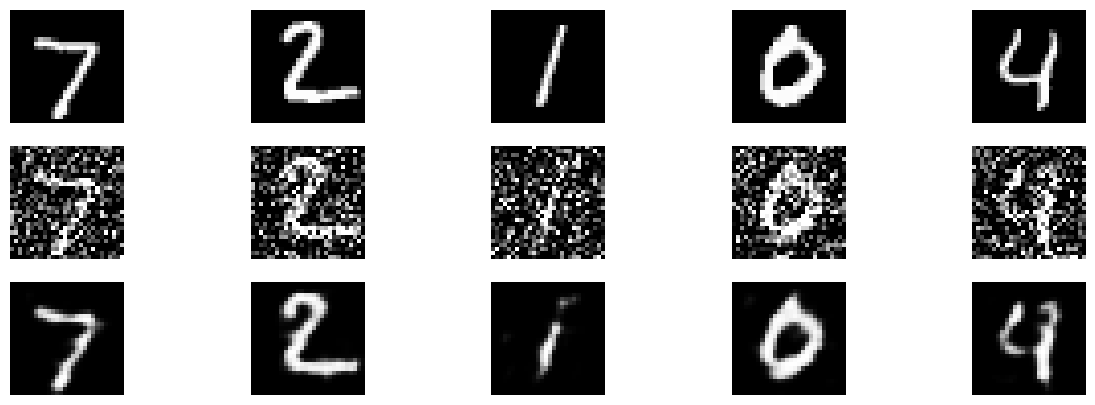

In [5]:
# Load and preprocess MNIST with noise
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Build autoencoder with more filters
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),  # Variation: 64 filters
    keras.layers.MaxPooling2D((2, 2), padding='same'),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.UpSampling2D((2, 2)),
    keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

# Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(x_train_noisy, x_train, epochs=3, batch_size=128, validation_split=0.2, verbose=1)

# Visualize results
denoised = model.predict(x_test_noisy[:5])
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(3, 5, i+1); plt.imshow(x_test[i].reshape(28, 28), cmap='gray'); plt.axis('off')
    plt.subplot(3, 5, i+6); plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray'); plt.axis('off')
    plt.subplot(3, 5, i+11); plt.imshow(denoised[i].reshape(28, 28), cmap='gray'); plt.axis('off')
plt.show()
# Explanation: More filters (64) enhance capacity to learn noise patterns, improving denoising.